In [1]:
from matplotlib import pyplot as plt

import numpy as np

from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn import metrics

In [2]:
def Get_Photo_Data(location, num_photos):
    '''
    Returns photos from data folder(resized, grayscaled) and binary class.
    
    '''
    datagen = ImageDataGenerator(rescale=1./255)
    
    data = datagen.flow_from_directory(
        location,
        target_size=(150, 150),
        batch_size=num_photos,
        color_mode='grayscale',
        class_mode='binary'
    )
    
    return data

In [3]:
#getting images and labels for models
train_photos = Get_Photo_Data('./data/archive/chest_xray/train/', 5216)
test_photos = Get_Photo_Data('./data/archive/chest_xray/test/', 624)
val_photos = Get_Photo_Data('./data/archive/chest_xray/val/', 16)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [4]:
# unpack images and labels for CM/dummy model
train_data, train_labels = next (train_photos)
test_data, test_labels = next (test_photos)
val_data, val_labels = next (val_photos)

In [5]:
# create DummyModel on most frequent class
dummy_model =  DummyClassifier(strategy='most_frequent')
dummy_model.fit(train_data, train_labels)

DummyClassifier(strategy='most_frequent')

In [6]:
# creating predictions to evalaute model 
y_pred = (dummy_model.predict(test_data))

In [7]:
# getting metrics for model
acc = dummy_model.score(test_data, test_labels)
rec = metrics.recall_score(test_labels,y_pred)
pre = metrics.precision_score(test_labels,y_pred)

print(f"Dummy Model accuracy: {acc}")
print(f"Dummy Model recall: {rec}")
print(f"Dummy Model precision: {pre}")

Dummy Model accuracy: 0.625
Dummy Model recall: 1.0
Dummy Model precision: 0.625


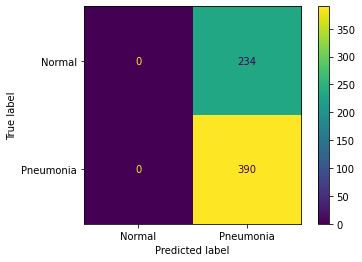

In [8]:
# Create CM for dummy model
cm_labels = ['Normal','Pneumonia']

actual = test_labels
predicted = y_pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Normal','Pneumonia'])

cm_display.plot()
plt.show()